In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/predictions.csv')


Descriptive Statistics:
                 UP      h35         spacs      h10          disc  \
count  13341.000000  13341.0  13341.000000  13341.0  13341.000000   
mean      16.567724      6.0     16.966269      6.0      7.001874   
std        1.685818      0.0      0.350286      0.0      0.069779   
min       16.000000      6.0     15.000000      6.0      6.000000   
25%       16.000000      6.0     17.000000      6.0      7.000000   
50%       16.000000      6.0     17.000000      6.0      7.000000   
75%       16.000000      6.0     17.000000      6.0      7.000000   
max       22.000000      6.0     19.000000      6.0      8.000000   

                ITR  
count  13341.000000  
mean      20.957275  
std        0.202245  
min       20.000000  
25%       21.000000  
50%       21.000000  
75%       21.000000  
max       21.000000  


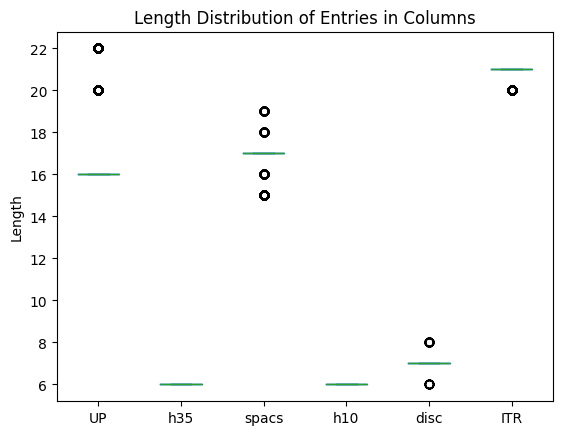

In [3]:
_df = df[['UP', 'h35', 'spacs', 'h10', 'disc', 'ITR']]

# Create a DataFrame with the length of each entry
lengths_df = _df.map(len)

# Describe the length distributions
print("\nDescriptive Statistics:")
print(lengths_df.describe())

# Plot the length distributions
import matplotlib.pyplot as plt

lengths_df.plot(kind='box')
plt.title('Length Distribution of Entries in Columns')
plt.ylabel('Length')
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler

df['Normalized Observed'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']])

In [5]:
sequences = {}

for index, row in df.iterrows():
    key = (row['UP'], row['h35'], len(row['spacs']), row['h10'], row['disc'], row['ITR'])
    if key not in sequences:
        sequences[key] = [row['Normalized Observed']]
    else:
        sequences[key].append(row['Normalized Observed'])

print(len(df)-len(sequences))


2036


In [6]:
# 'key' column with length
df['key'] = df.apply(lambda row: (row['UP'], row['h35'], len(row['spacs']), row['h10'], row['disc'], row['ITR']), axis=1)

# 'key' column without length
# df['key'] = df.apply(lambda row: (row['UP'], row['h35'], row['h10'], row['disc'], row['ITR']), axis=1)

# Identify duplicated rows based on the 'key' column
duplicated_rows = df[df.duplicated('key', keep=False)]

# Group duplicated rows by 'key' and compute the range for 'Normalized Observed' values
grouped = duplicated_rows.groupby('key')['Normalized Observed'].agg(['min', 'max'])
grouped['range'] = grouped['max'] - grouped['min']


In [7]:
grouped['range'] = grouped['max'] - grouped['min']

# Calculate the average range
average_range = grouped['range'].mean()

print(f"Average range of 'Normalized Observed' values for duplicated rows: {average_range}")


Average range of 'Normalized Observed' values for duplicated rows: 0.30333898682973937


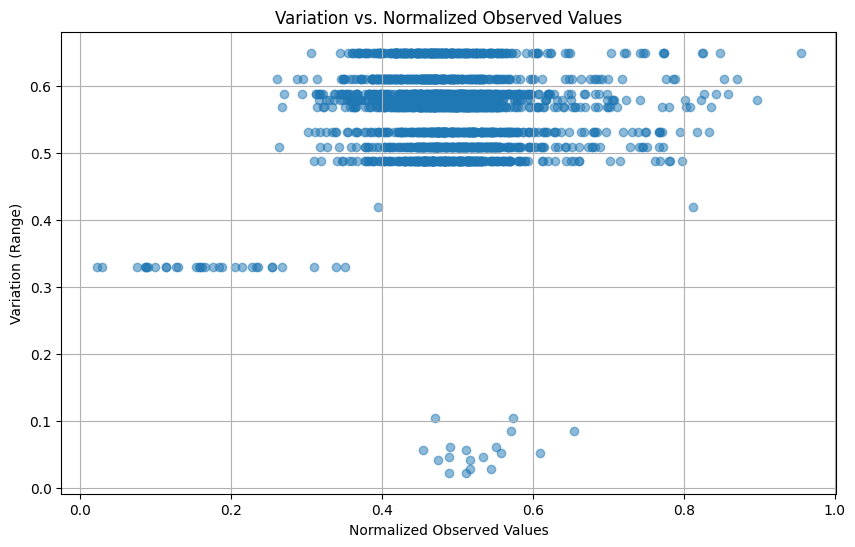

In [8]:
# Plot the variation of 'Normalized Observed' values compared to the 'Normalized Observed' values

plot_df = pd.merge(duplicated_rows, grouped, left_on='key', right_index=True)

# Plot using the DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(plot_df['Normalized Observed'], plot_df['range'], alpha=0.5)
plt.title('Variation vs. Normalized Observed Values')
plt.xlabel('Normalized Observed Values')
plt.ylabel('Variation (Range)')
plt.grid(True)
plt.show()

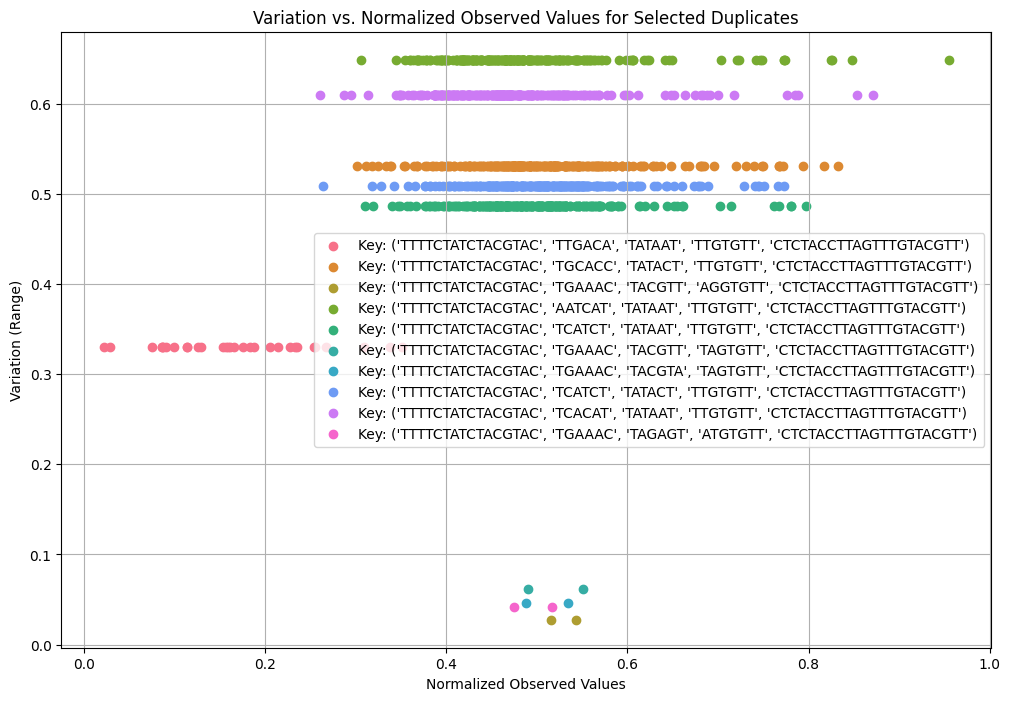

In [9]:
# Plot the variation of 'Normalized Observed' values compared to the 'Normalized Observed' values

# Prepare data for plotting
plot_df = pd.merge(duplicated_rows, grouped, left_on='key', right_index=True)

# Select 10 random duplicates for plotting
sample_keys = np.random.choice(plot_df['key'].unique(), 10, replace=False)
sample_df = plot_df[plot_df['key'].isin(sample_keys)]

# Assign a color to each of the selected duplicates
colors = sns.color_palette("husl", n_colors=10)  # Using seaborn's husl colormap
color_map = dict(zip(sample_keys, colors))

# Plot using the DataFrame
plt.figure(figsize=(12, 8))
for key in sample_keys:
    subset = sample_df[sample_df['key'] == key]
    plt.scatter(subset['Normalized Observed'], subset['range'], label=f'Key: {key}', color=color_map[key])

plt.title('Variation vs. Normalized Observed Values for Selected Duplicates')
plt.xlabel('Normalized Observed Values')
plt.ylabel('Variation (Range)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
ranges = grouped['range']

mean_range = ranges.mean()
median_range = ranges.median()
mode_range = stats.mode(ranges).mode
std_dev_range = ranges.std()

print(f"mean range of {mean_range:.3f}")
print(f"median range of {median_range:.3f}")
print(f"mode range of {mode_range:.3f}")
print(f"standard deviation of {std_dev_range:.3f}")


mean range of 0.303
median range of 0.330
mode range of 0.022
standard deviation of 0.252
